In [1]:
import pydotplus 
import pandas as pd
import numpy as np

from IPython.display import Image
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn import cross_validation

/home/maxim/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## German credit data

In [3]:
credit_data = pd.read_csv('german_credit.csv', header=0)
credit_data.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [4]:
f_names = credit_data.columns.values.tolist()
f_names[9] = 'Sex and Marital Status'
c_names = ['bad', 'good']
f_names

['Creditability',
 'Account Balance',
 'Duration of Credit (month)',
 'Payment Status of Previous Credit',
 'Purpose',
 'Credit Amount',
 'Value Savings/Stocks',
 'Length of current employment',
 'Instalment per cent',
 'Sex and Marital Status',
 'Guarantors',
 'Duration in Current address',
 'Most valuable available asset',
 'Age (years)',
 'Concurrent Credits',
 'Type of apartment',
 'No of Credits at this Bank',
 'Occupation',
 'No of dependents',
 'Telephone',
 'Foreign Worker']

## Строим дерево с помощью sklearn

In [5]:
model = tree.DecisionTreeClassifier(max_depth = 3)
model.fit(credit_data.iloc[:, 1:], credit_data.iloc[:, 0])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [6]:
dot_data = tree.export_graphviz(model, out_file="small_tree.out", 
                         feature_names=f_names[1:],  
                         class_names=c_names,
                         filled=True, rounded=True,
                         special_characters=True)

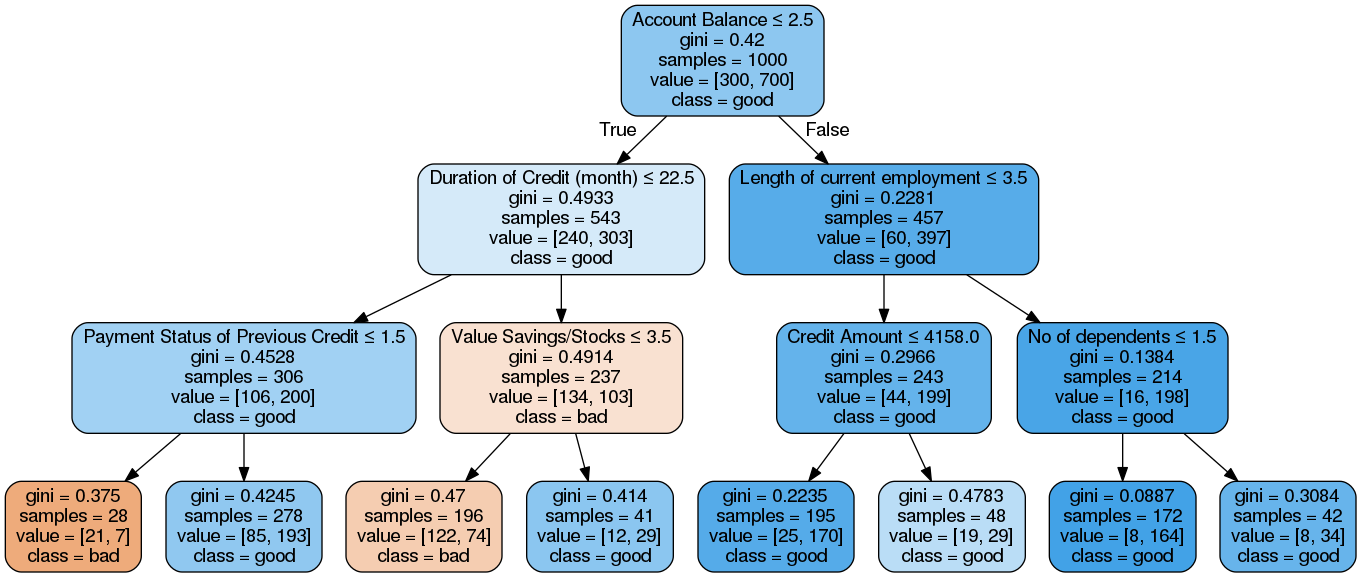

In [7]:
graph = pydotplus.graphviz.graph_from_dot_file("small_tree.out")  
Image(graph.create_png())

Основной критерий разбиения в дереве - количество денег на счету, что вполне логично. Дальше, тех кто не зарекомендовал себя как "обеспеченные", сортируют по продолжительности срока выдачи кредита и чем этот срок больше, тем менее охотно дерево советует выдавать кредит.

## Зависимость качества от глубины деревьев

In [8]:
d_trees = [x for x in range(1, 25)]
print(d_trees)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [9]:
%%time
scoring = []
for d_tree in d_trees:
    estimator = tree.DecisionTreeClassifier(max_depth = d_tree)
    score = cross_validation.cross_val_score(estimator, credit_data.iloc[:, 1:], credit_data.iloc[:, 0], 
                                             scoring = 'accuracy', cv = 3)    
    scoring.append(score)
scoring = np.asmatrix(scoring)

CPU times: user 444 ms, sys: 12 ms, total: 456 ms
Wall time: 459 ms


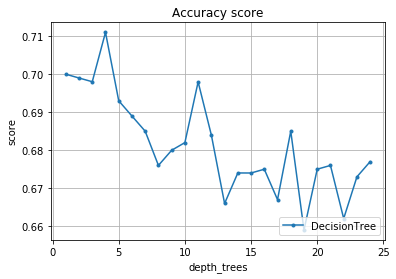

In [10]:
pylab.plot(d_trees, scoring.mean(axis = 1), marker='.', label='DecisionTree')
pylab.grid(True)
pylab.xlabel('depth_trees')
pylab.ylabel('score')
pylab.title('Accuracy score')
pylab.legend(loc='lower right')